# Example: Truncation of Bid from Caspase8 - Bid complex

## Casp8 + Bid <--> Casp8-Bid --> Casp8 + tBid

In [1]:
# import the pysb module
from pysb import *

In [2]:
# instantiate a model
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7f7a58afeb20>

In [3]:
# declare monomers
# Casp8 with a binding site 'b'
Monomer('Casp8', ['b'])
# Bid with binding sites 'b' and 's', where 's' has two states 'u' and 't' 
Monomer('Bid', ['b', 's'], {'s': ['u', 't']})

Monomer('Bid', ['b', 's'], {'s': ['u', 't']})

In [4]:
# input the reaction parameters
# forward Casp8-Bid complexation rate kf = 10^(-7)
Parameter('kf', 1e-7)
# backward Casp8-Bid complexation rate kb = 10^(-3)
Parameter('kb', 1e-3)
# Casp8-Bid dissociation rate to return the original Casp8 and Bid in truncation, kd = 1
Parameter('kd', 1)

Parameter('kd', 1.0)

In [5]:
# input the rules
# Unbound Casp8 binds to unbound Bid in 'u' state, which is a reversable complexation
Rule('Casp8_binds_Bid', Casp8(b=None) + Bid(b=None, s='u') | Casp8(b=1)%Bid(b=1, s='u'), kf, kb)
# One way dissociation reaction to return the original Casp8 and Bid but in truncation
Rule('tBid_from_Casp8Bid', Casp8(b=1)%Bid(b=1, s='u') >> Casp8(b=None) + Bid(b=None, s='t'), kd)

Rule('tBid_from_Casp8Bid', Casp8(b=1) % Bid(b=1, s='u') >> Casp8(b=None) + Bid(b=None, s='t'), kd)

In [6]:
# Initial conditions
# Initialize unbound Casp8 with a value 1000
Parameter('initCasp8', 1000)
Initial(Casp8(b=None), initCasp8)
# Initialize unbound Bid with a value 10000
Initial(Bid(b=None, s='u'), Parameter('initBid', 10000))

Initial(Bid(b=None, s='u'), initBid)

In [7]:
# Observables
Observable('freeCasp8', Casp8(b=None))
Observable('freeBid', Bid(b=None, s='u'))
Observable('truncatedBid', Bid(b=None, s='t'))
Observable('totalBid', Bid())

Observable('totalBid', Bid())

In [8]:
# Run the simulator
from pysb.simulator import ScipyOdeSimulator
from pylab import *

# Simulate model
time = linspace(0, 20000) # in seconds 
sim = ScipyOdeSimulator(model, tspan = time).run()
simResults = sim.all # an array of observables 

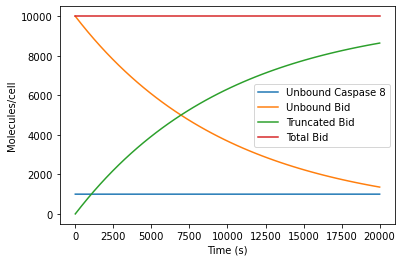

In [9]:
# plot the results
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time, simResults['freeCasp8'], label='Unbound Caspase 8')
plt.plot(time, simResults['freeBid'], label='Unbound Bid')
plt.plot(time, simResults['truncatedBid'], label='Truncated Bid')
plt.plot(time, simResults['totalBid'], label='Total Bid')
plt.legend(loc=0)
plt.xlabel("Time (s)")
plt.ylabel("Molecules/cell")
plt.show()